# 0.Игра в имитацию
    выполнил Сергей Харитонов ПВ-32

# Задание
Дискретная случайная величина ξ принимает значения 0, 1, 2 и 3 с вероятностями соответствующими данным варианта. Используя генератор псевдослучайных чисел, получить 10000 чисел, имитирующих поведение ξ. Проверить на уровне значимости 0,05 соответствие полученных данных распределению ξ, используя критерий сравнения долей. Вероятности: р0=i/2*(i+j+k), р1=(j+k)/2*(i+j+k), р2=(i+k)/2*(i+j+k), р3=j/2*(i+j+k). Значения i, j, k являются последними тремя цифрами зачетки. Если какая-то из этих трех цифр равна 0, то вместо 0 берется 10.

In [1]:
# Последние 3 цифры зачетки
i = 1
j = 6
k = 3

In [15]:
# Вероятности
p_list = [
    i/(2*(i+j+k)),
    (j+k)/(2*(i+j+k)),
    (i+k)/(2*(i+j+k)),
    j/(2*(i+j+k))
]
print("Вероятности")
for i, p in enumerate(p_list):
    print(f"P{i} = {p}")

Вероятности
P0 = 0.125
P1 = 0.375
P2 = 0.25
P3 = 0.25


In [25]:
# класс описывающий Дискретную Случайную Величину
from random import random
class DRV:
    def __init__(self, p_list):
        self.p_list = p_list
        self.split_segment = self.get_split_segment(p_list)
    

    #     получаем границы интервалов на отрезке
    @staticmethod
    def get_split_segment(p_list):
        split_segment = p_list.copy()
        for i in range(len(split_segment)-1):
            split_segment[i+1] += split_segment[i]
        return split_segment

    #     получаем значение ДСВ
    def get_drv_value(self):
        random_value = random()
        segment = 0
        
        while random_value >= self.split_segment[segment]:
            segment += 1
            
        return segment

In [31]:
# формирование выборки
drv = DRV(p_list)
generated_p_values = [drv.get_drv_value() for _ in range(10000)]
print("Ваша выборка")
print(generated_p)

Ваша выборка
[3, 1, 1, 1, 0, 1, 3, 1, 3, 2, 1, 1, 1, 0, 3, 1, 1, 1, 0, 0, 1, 0, 0, 2, 2, 1, 2, 3, 2, 1, 1, 1, 3, 3, 2, 2, 1, 1, 1, 1, 1, 3, 2, 1, 2, 1, 1, 2, 1, 0, 1, 1, 3, 1, 2, 1, 0, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1, 2, 1, 2, 1, 1, 2, 1, 3, 3, 2, 1, 2, 3, 2, 0, 2, 1, 2, 1, 1, 1, 3, 0, 0, 2, 1, 2, 3, 1, 2, 2, 0, 0, 3, 0, 3, 1, 3, 1, 2, 1, 0, 0, 1, 1, 1, 3, 3, 2, 3, 0, 2, 2, 2, 1, 3, 1, 3, 2, 1, 1, 1, 3, 2, 2, 3, 1, 0, 2, 0, 1, 2, 1, 3, 1, 1, 3, 3, 1, 3, 1, 1, 2, 3, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 0, 1, 1, 3, 1, 1, 1, 2, 2, 3, 0, 0, 1, 2, 2, 2, 0, 0, 1, 3, 2, 0, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 2, 1, 3, 3, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 0, 3, 3, 3, 2, 0, 2, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 2, 2, 1, 2, 0, 3, 1, 0, 3, 3, 1, 1, 3, 1, 2, 1, 3, 2, 0, 2, 3, 3, 2, 1, 3, 1, 3, 2, 1, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 3, 3, 3, 1, 1, 0, 2, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 2, 3, 0, 2, 1,

In [30]:
# получение частот выборки
generated_p_list = [generated_p_values.count(p)/len(generated_p_values) for p in range(len(p_list))]
print("Частоты полученной выборки")
print(generated_p_list)

Частоты полученной выборки
[0.1211, 0.3786, 0.2538, 0.2465]


In [34]:
# Проверка соответствия полученной выборки заданному распределению 
# на уровне значимости 0,05
from scipy.stats import chisquare
K, p = chisquare(generated_p_list, p_list)
print(f"K={K}, p={p}")

K=0.00026300000000000075, p=0.9999988657255124


Как мы можем видеть гипотезы согласуются

Выборка


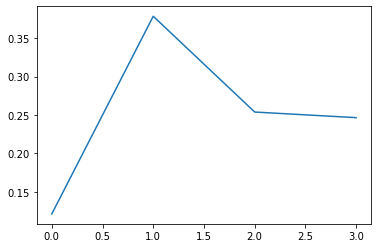

Заданное распределение


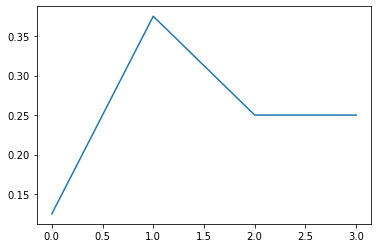

In [37]:
import matplotlib.pyplot as plt
print("Выборка")
plt.plot(generated_p_list)
plt.show()

print("Заданное распределение")
plt.plot(p_list)
plt.show()